## India Chloropleth using GeoJSON and GeoPandas

In [12]:
# file_path= "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/data/shapefiles-master/india/parliament/india_2014_parliament.json"
folder_path= "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/data/shapefiles-master/india/parliament/"


  ST_NAME                    PC_NAME ST_CODE  PC_CODE  Res  \
0      AN  Andaman & Nicobar Islands     U01        1  GEN   
1      AP                  Zahirabad     S01        5  GEN   
2      AP                      Araku     S01       18   ST   
3      AP                    Khammam     S01       17  GEN   
4      AP                      Medak     S01        6  GEN   

                                            geometry  
0  MULTIPOLYGON (((93.02729 13.58688, 93.04048 13...  
1  POLYGON ((78.53309 18.46292, 78.55114 18.44624...  
2  POLYGON ((83.79596 19.01607, 83.84258 18.91780...  
3  POLYGON ((81.50249 17.47942, 81.50255 17.47451...  
4  POLYGON ((77.86889 17.60937, 77.89666 17.67467...  
<class 'geopandas.geodataframe.GeoDataFrame'>


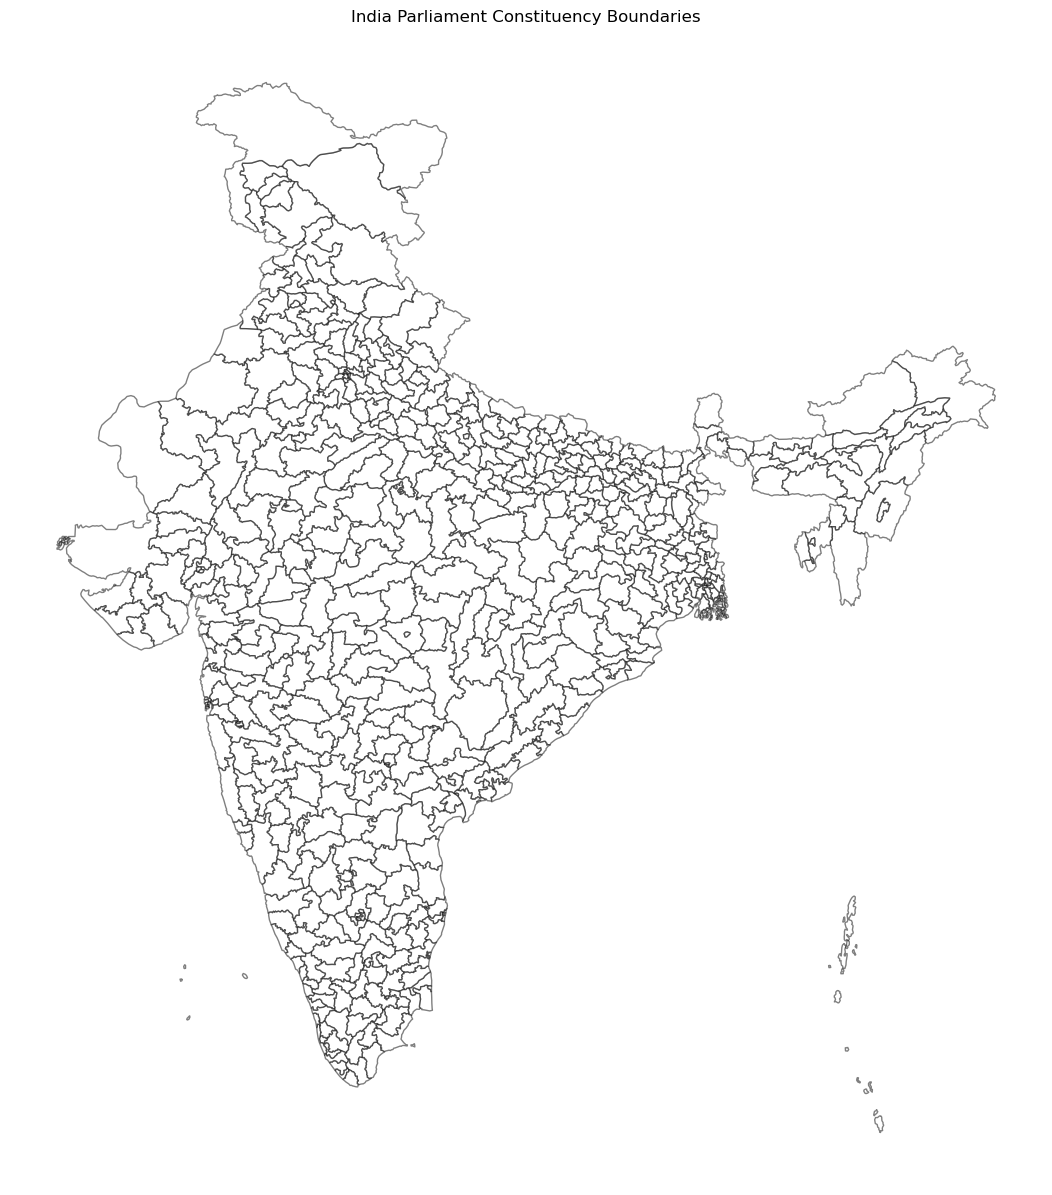

In [39]:
# Parliament Constituencies
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# File Name - GeoJSON file
folder_path= "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/data/shapefiles-master/india/parliament/"
file_name = "india_2014_parliament.json"
file_path= os.path.join(folder_path, file_name)

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Display the GeoDataFrame
# print(gdf)
print(gdf.head())
print(type(gdf))
      
# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Set the background color of the axes
ax.set_facecolor('white')  # Change 'white' to your preferred color

# Plot the GeoDataFrame with custom line width and transparency
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=1, alpha=0.5)

# Remove the axis for a cleaner look
ax.axis('off')

# Display the plot
plt.title('India Parliament Constituency Boundaries')
plt.show()

In [37]:
import folium
import geopandas as gpd

# File Name - GeoJSON file
file_name = "india_2014_parliament.json"
file_path= os.path.join(folder_path, file_name)

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Download the GeoJSON file from the GitHub repository
# response = requests.get(github_url)
# geojson_data = response.json()

# Create a map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5.5)

# Add the GeoJSON data to the map
folium.GeoJson(gdf).add_to(india_map)

# Display the map
india_map


In [40]:
# this example uses plotly, without geopandas

import plotly.graph_objects as go
import json
import os

# File Name - GeoJSON file
file_name = "india_2014_parliament.json"
file_path= os.path.join(folder_path, file_name)

# Load the GeoJSON data from the local file
with open(file_path, 'r') as file:
    geojson_data = json.load(file)


# Extract the list of unique identifiers from the GeoJSON file
# Here we assume the identifier key is 'id' in the properties of each feature
identifiers = [feature['properties']['PC_NAME'] for feature in geojson_data['features']]

# Create a map using Plotly Graph Objects
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_data,
    locations=identifiers,  # Use the list of identifiers
    z=[1]*len(identifiers),  # Placeholder values; update with actual data if available
    colorscale="Viridis",
    marker_opacity=0.5,
    marker_line_width=1
))

# Set up the map layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=4,
    mapbox_center={"lat": 20.5937, "lon": 78.9629},
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the map
fig.show()